**Notes:**
* This code rolls up the trial level data created in previous step into one row for each pair of drug-indication/therapy area
* During the roll up process, we create appropriate aggregation for each variable like trial duration, patient enrollment count, minimun/maximum age of enrolled patients, gender, etc.
* We also hot encode categorical variables

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !cp /content/drive/MyDrive/Capstone2024/Datasets/nov_23/*.txt ./
!cp /content/drive/MyDrive/EverGrowth_Group1/Datasets/nov_23/*.txt ./

In [4]:
!ls /content/drive/MyDrive/EverGrowth_Group1/Datasets/nov_23/rollup_df_1123_final.txt

/content/drive/MyDrive/EverGrowth_Group1/Datasets/nov_23/rollup_df_1123_final.txt


In [5]:
pd.read_csv('rollup_df_1123_final.txt', sep='|').drug_outcome.value_counts()

,count
drug_outcome,
0,1412
1,627


In [16]:
pd.read_csv('rollup_df_1123_seq_final.txt', sep='|').drug_outcome.value_counts()

,count
drug_outcome,
1,3713
0,2975


In [6]:
pd.read_csv('rollup_df_1123_final.txt', sep='|').groupby(['Drug Name', 'disease_type']).drug_outcome.count().value_counts()

,count
drug_outcome,
1,2039


In [7]:
pd.read_csv('rollup_df_1123_final.txt', sep='|').columns.values

array(['Unnamed: 0', 'Drug Name', 'disease_type', 'drug_outcome',
       'trial_count', 'trial_actual_duration',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure', 'number_of_arms',
       'adult', 'child', 'has_single_facility', 'has_us_facility',
       'healthy_volunteers', 'min_age', 'max_age', 'number_of_facilities',
       'enrollment', 'Spacy_Pregnant_Women_Excluded',
       'LLama3_2_Criteria_Robustness',
       'LLM_GBT_4o_Human_Importance_Ratings',
       'new_therapy_area_Autoimmune', 'new_therapy_area_Bone',
       'new_therapy_area_Cardiovascular', 'new_therapy_area_Dermatology',
       'new_therapy_area_Endocrinology',
       'new_therapy_area_Gastrointestinal',
       'new_therapy_area_Genetic and Rare Diseases',
       'new_therapy_area_Hematology', 'new_therapy_area_Hepatic diseases',
       'new_therapy_area_Infections (bacterial)',
       'new_therapy_area_Infections (viral)',
       'new_therapy_area_Infectious Diseases

In [39]:
pd.read_csv('rollup_df_1123_seq_final.txt', sep='|').columns.values

array(['Unnamed: 0', 'trial_drug_cleaned', 'disease_type', 'drug_outcome',
       'nct_id', 'pcd', 'enrollment', 'actual_duration',
       'number_of_primary_outcomes_to_measure',
       'number_of_secondary_outcomes_to_measure', 'number_of_arms',
       'adult', 'child', 'has_single_facility', 'has_us_facility',
       'healthy_volunteers', 'gender_f', 'gender_m', 'minimum_age_num',
       'maximum_age_num', 'number_of_facilities',
       'Spacy_Pregnant_Women_Excluded', 'LLama3_2_Criteria_Robustness',
       'LLM_GBT_4o_Human_Importance_Ratings', 'cumsum_enrollment',
       'cumavg_enrollment', 'cumsum_trial_duration',
       'cumavg_trial_duration',
       'cumulative_number_of_primary_outcomes_to_measure',
       'cumulative_number_of_secondary_outcomes_to_measure',
       'cumulative_number_of_arms', 'cumulative_adult',
       'cumulative_child', 'cumulative_single_facility',
       'cumulative_us_facility', 'cumulative_healthy_volunteers',
       'cumulative_gender_f', 'cumulativ

In [37]:
rollup_df_1123_final = pd.read_csv('rollup_df_1123_final.txt', sep='|')
rollup_df_1123_seq_final = pd.read_csv('rollup_df_1123_seq_final.txt', sep='|')

In [40]:
rollup_df_1123_final['drug_disease'] = rollup_df_1123_final['Drug Name'] + '_' + rollup_df_1123_final['disease_type']
rollup_df_1123_seq_final['drug_disease'] = rollup_df_1123_seq_final['trial_drug_cleaned'] + '_' + rollup_df_1123_seq_final['disease_type']

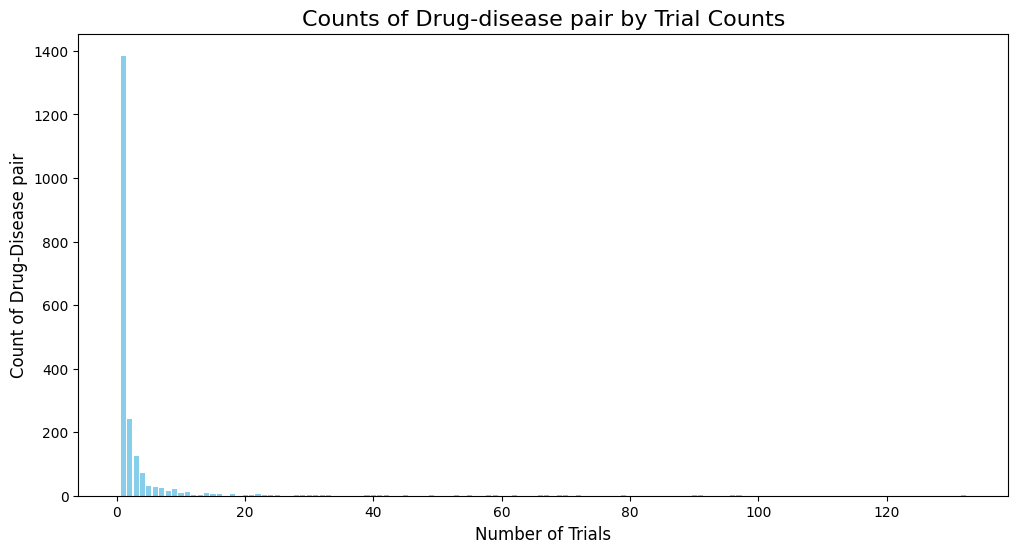

In [55]:
trial_count = (rollup_df_1123_final.groupby('trial_count')['drug_disease'].nunique()).reset_index(name='drug_disease')

plt.figure(figsize=(12, 6))
plt.bar(trial_count.trial_count, trial_count.drug_disease, color='skyblue')

# Add chart title and labels
plt.title('Counts of Drug-disease pair by Trial Counts', fontsize=16)
plt.xlabel('Number of Trials', fontsize=12)
plt.ylabel('Count of Drug-Disease pair', fontsize=12)

# Display the chart
plt.show()

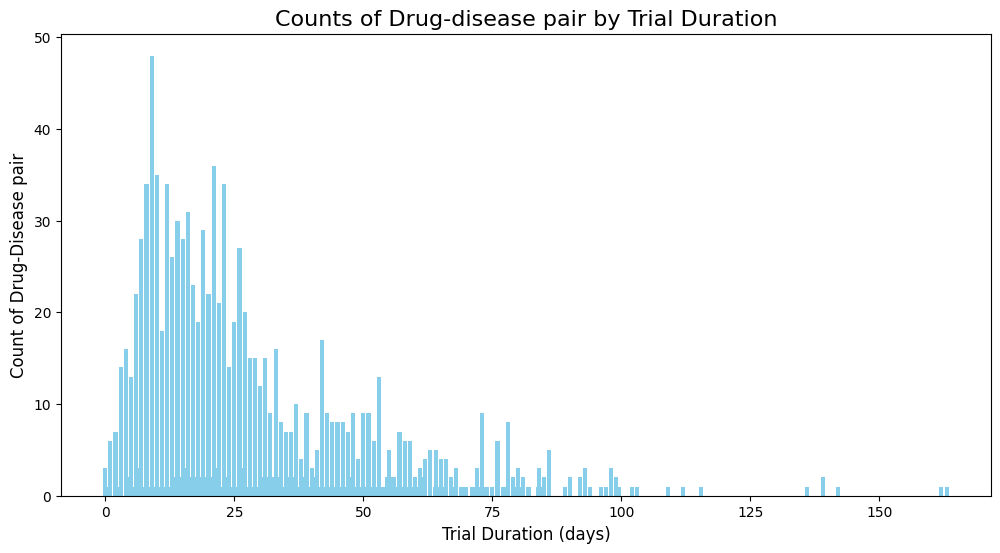

In [54]:
trial_duration = (rollup_df_1123_final.groupby('trial_actual_duration')['drug_disease'].nunique()).reset_index(name='drug_disease')

plt.figure(figsize=(12, 6))
plt.bar(trial_duration.trial_actual_duration, trial_duration.drug_disease, color='skyblue')

# Add chart title and labels
plt.title('Counts of Drug-disease pair by Trial Duration', fontsize=16)
plt.xlabel('Trial Duration (days)', fontsize=12)
plt.ylabel('Count of Drug-Disease pair', fontsize=12)

# Display the chart
plt.show()

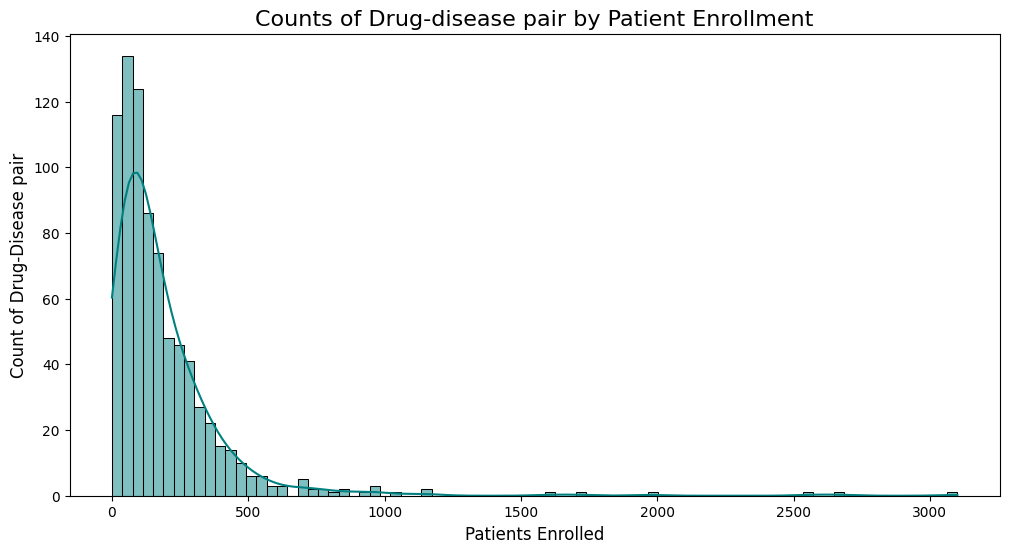

In [61]:
patient_enrollment = (rollup_df_1123_final.groupby('enrollment')['drug_disease'].nunique()).reset_index(name='drug_disease')

plt.figure(figsize=(12, 6))
sns.histplot(data=patient_enrollment, x='enrollment', bins='auto', kde=True, color='teal')

# Add chart title and labels
plt.title('Counts of Drug-disease pair by Patient Enrollment', fontsize=16)
plt.xlabel('Patients Enrolled', fontsize=12)
plt.ylabel('Count of Drug-Disease pair', fontsize=12)

# Display the chart
plt.show()

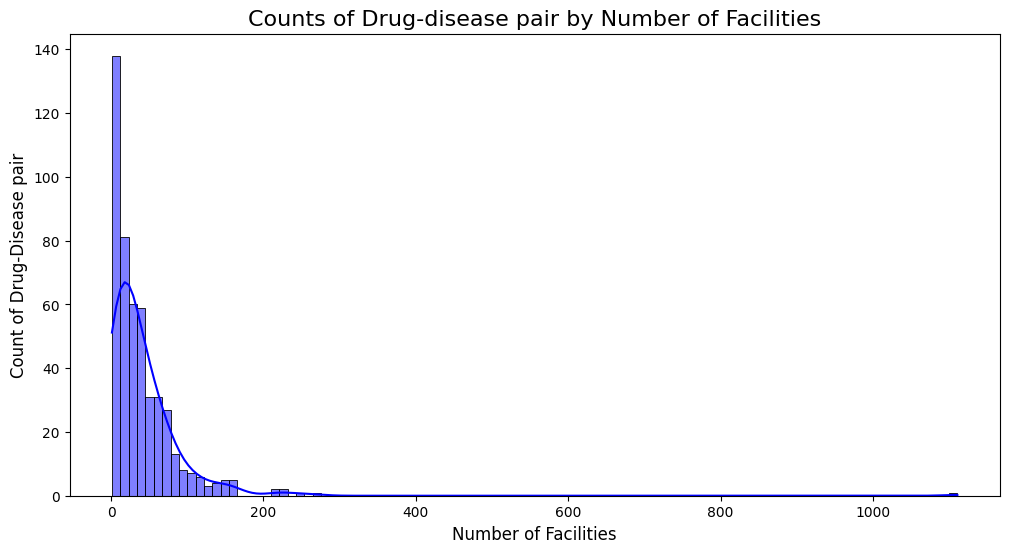

In [63]:
facilities = (rollup_df_1123_final.groupby('number_of_facilities')['drug_disease'].nunique()).reset_index(name='drug_disease')

plt.figure(figsize=(12, 6))
sns.histplot(data=facilities, x='number_of_facilities', bins='auto', kde=True, color='blue')

# Add chart title and labels
plt.title('Counts of Drug-disease pair by Number of Facilities', fontsize=16)
plt.xlabel('Number of Facilities', fontsize=12)
plt.ylabel('Count of Drug-Disease pair', fontsize=12)

# Display the chart
plt.show()

In [ ]:
# load the big merged table with drugs and multiple trial rows
df_merged_df_1123 = pd.read_csv('merged_df_1123.txt', sep='|')
df_merged_df_1123.shape

<ipython-input-25-cf556179b2ff>:2: DtypeWarning: Columns (23,78,126,127) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged_df_1123 = pd.read_csv('merged_df_1123.txt', sep='|')


(24959, 140)

In [ ]:
df_merged_df_1123['drug_outcome'] = df_merged_df_1123['drug_outcome'].map({'success': 1, 'failure': 0})

In [ ]:
df_merged_df_1123['drug_outcome']

,drug_outcome
0,1
1,1
2,1
3,1
4,1
...,...
24954,0
24955,0
24956,0
24957,0


In [ ]:
df_merged_df_1123 = df_merged_df_1123.pipe(
    lambda df: df.drop(columns='drug_outcome').merge(
        df.groupby(['Drug Name','disease_type']).drug_outcome.max().reset_index()
    )
)


In [ ]:
df_merged_df_1123.head()

,Unnamed: 0,nct_id,intervention_type,description,trial_drug_cleaned,conditions,Drug Name,Highest Status,Other Drug Names,Originator Company,Originator Company HQ,Active Companies,Active Companies HQ,Therapy Area,Active Indications,Action,Technologies,Regulatory Designations,Inactive Indications,Inactive Companies,Has Deals,Last Change Date,Added Date,First Launched Date,Extract,Drug Id,cortellis_cleaned_drug,nlm_download_date_description,study_first_submitted_date,results_first_submitted_date,disposition_first_submitted_date,last_update_submitted_date,study_first_submitted_qc_date,study_first_posted_date,study_first_posted_date_type,results_first_submitted_qc_date,results_first_posted_date,results_first_posted_date_type,disposition_first_submitted_qc_date,disposition_first_posted_date,disposition_first_posted_date_type,last_update_submitted_qc_date,last_update_posted_date,last_update_posted_date_type,start_month_year,start_date_type,start_date,verification_month_year,verification_date,completion_month_year,completion_date_type,completion_date,primary_completion_month_year,primary_completion_date_type,primary_completion_date,target_duration,study_type,acronym,baseline_population,brief_title,official_title,overall_status,last_known_status,phase,enrollment,enrollment_type,source,limitations_and_caveats,number_of_arms,number_of_groups,why_stopped,has_expanded_access,expanded_access_type_individual,expanded_access_type_intermediate,expanded_access_type_treatment,has_dmc,is_fda_regulated_drug,is_fda_regulated_device,is_unapproved_device,is_ppsd,is_us_export,biospec_retention,biospec_description,ipd_time_frame,ipd_access_criteria,ipd_url,plan_to_share_ipd,plan_to_share_ipd_description,created_at,updated_at,source_class,delayed_posting,expanded_access_nctid,expanded_access_status_for_nctid,fdaaa801_violation,baseline_type_units_analyzed,patient_registry,drug_outcome,disease_type,new_therapy_area,id_x,number_of_facilities,number_of_nsae_subjects,number_of_sae_subjects,registered_in_calendar_year,nlm_download_date,actual_duration,were_results_reported,months_to_report_results,has_us_facility,has_single_facility,minimum_age_num,maximum_age_num,minimum_age_unit,maximum_age_unit,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_other_outcomes_to_measure,id_y,sampling_method,gender,minimum_age,maximum_age,healthy_volunteers,population,criteria,gender_description,gender_based,adult,child,older_adult,official_role,official_name,official_affiliation,id,trial_country,country_removed,LLM_GBT_4o_Human_Importance_Ratings,LLama3_2_Criteria_Robustness,Spacy_Pregnant_Women_Excluded
0,0,NCT00606502,DRUG,150 mg orally in tablet form~Administered dail...,erlotinib,non-small cell lung cancer,erlotinib,Launched,CP-358774; CP-358774-01; NSC-718781; OSI-420; ...,OSI Pharmaceuticals Inc,OSI Pharmaceuticals Inc (US),Astellas Pharma Inc; Baheal Pharmaceutical gro...,Astellas Pharma Inc (Japan); Baheal Pharmaceut...,Cancer; Dermatologic,Acute myelogenous leukemia; Breast tumor; Cent...,Anticancer protein kinase inhibitor; EGFR fami...,Film coating; Oral formulation; Small molecule...,Fast Track; Orphan Drug,Cancer; Colorectal tumor; Ependymoma; Esophagu...,Nippon Roche KK; Pfizer Inc,Yes,2024-07-04,1996-03-28,2004-11-24,Erlotinib (Tarceva; OSI-744; CP-358774; NSC-71...,11961,erlotinib,NaN,2008-01-22,2010-12-22,NaN,2021-02-08,2008-02-01,2008-02-04,ESTIMATED,2010-12-22,2011-01-20,ESTIMATED,NaN,NaN,NaN,2021-02-08,2021-03-05,ACTUAL,2008-01,NaN,2008-01-31,2021-02,2021-02-28,2010-06-24,ACTUAL,2010-06-24,2010-06-24,ACTUAL,2010-06-24,NaN,INTERVENTIONAL,NaN,NaN,Study of Pralatrexate vs. Erlotinib for Non-Sm...,"A Randomized, Phase 2b, Multi-center Study of ...",COMPLETED,NaN,PHASE2,201.0,ACTUAL,"Spectrum Pharmaceuticals, Inc",The date of the CRF database cut-off for patie...,2.0,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-04 13:24:13.009685,2024-08-04 13:24:13.009685,INDUSTRY,NaN,NaN,NaN,NaN,NaN

In [ ]:
df_merged_df_1123.columns.to_list()

['Unnamed: 0',
 'nct_id',
 'intervention_type',
 'description',
 'trial_drug_cleaned',
 'conditions',
 'Drug Name',
 'Highest Status',
 'Other Drug Names',
 'Originator Company',
 'Originator Company HQ',
 'Active Companies',
 'Active Companies HQ',
 'Therapy Area',
 'Active Indications',
 'Action',
 'Technologies',
 'Regulatory Designations',
 'Inactive Indications',
 'Inactive Companies',
 'Has Deals',
 'Last Change Date',
 'Added Date',
 'First Launched Date',
 'Extract',
 'Drug Id',
 'cortellis_cleaned_drug',
 'nlm_download_date_description',
 'study_first_submitted_date',
 'results_first_submitted_date',
 'disposition_first_submitted_date',
 'last_update_submitted_date',
 'study_first_submitted_qc_date',
 'study_first_posted_date',
 'study_first_posted_date_type',
 'results_first_submitted_qc_date',
 'results_first_posted_date',
 'results_first_posted_date_type',
 'disposition_first_submitted_qc_date',
 'disposition_first_posted_date',
 'disposition_first_posted_date_type',
 'last

In [ ]:
# start rollup data with one pair of drug and disease type row
rollup_df_1123 = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['nct_id'].nunique().reset_index(name='trial_count')
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count
0,123I-iodometomidate,Renal,Oncology,0,1
1,123I-iodometomidate,Renal Disease,Other,0,1
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1
4,2-deoxyglucose,Prostate,Oncology,0,1


In [ ]:
# calculate mean trial duration (actual)
trial_actual_duration = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['actual_duration'].mean().reset_index(name='trial_actual_duration')

In [ ]:
# merge avg trial duration with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, trial_actual_duration, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration
0,123I-iodometomidate,Renal,Oncology,0,1,21.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0


In [ ]:
# calculate mean number_of_primary_outcomes_to_measure
number_of_primary_outcomes_to_measure = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['number_of_primary_outcomes_to_measure'].mean().reset_index(name='number_of_primary_outcomes_to_measure')

In [ ]:
# replace NaN with 1 in number_of_primary_outcomes_to_measure
number_of_primary_outcomes_to_measure['number_of_primary_outcomes_to_measure'] = number_of_primary_outcomes_to_measure['number_of_primary_outcomes_to_measure'].fillna(1)

In [ ]:
# merge avg number_of_primary_outcomes_to_measure with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, number_of_primary_outcomes_to_measure, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0


In [ ]:
# calculate mean number_of_secondary_outcomes_to_measure
number_of_secondary_outcomes_to_measure = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['number_of_secondary_outcomes_to_measure'].mean().reset_index(name='number_of_secondary_outcomes_to_measure')

In [ ]:
# replace NaN with 0 in number_of_secondary_outcomes_to_measure
number_of_secondary_outcomes_to_measure['number_of_secondary_outcomes_to_measure'] = number_of_secondary_outcomes_to_measure['number_of_secondary_outcomes_to_measure'].fillna(0)

In [ ]:
# merge avg number_of_secondary_outcomes_to_measure with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, number_of_secondary_outcomes_to_measure, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0


In [ ]:
# calculate mean number_of_arms
number_of_arms = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['number_of_arms'].mean().reset_index(name='number_of_arms')

In [ ]:
# replace NaN with 1 in number_of_arms
number_of_arms['number_of_arms'] = number_of_arms['number_of_arms'].fillna(1)

In [ ]:
# merge avg number_of_arms with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, number_of_arms, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0


In [ ]:
# rollup_df_1123.drop(columns=['number_of_primary_outcomes_to_measure', 'number_of_secondary_outcomes_to_measure', 'number_of_arms'], inplace=True)

In [ ]:
# get adult flag
adult_flag = df_merged_df_1123[['Drug Name','disease_type','new_therapy_area','drug_outcome','adult']].drop_duplicates()

In [ ]:
# remove duplicate adult flag
adult_flag = adult_flag.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['adult'].max().reset_index(name='adult')

In [ ]:
# merge adult flag with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, adult_flag, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123['adult'] = np.where(rollup_df_1123['adult'] == 't', 1, 0)
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1


In [ ]:
# get child flag
child_flag = df_merged_df_1123[['Drug Name','disease_type','new_therapy_area','drug_outcome','child']].drop_duplicates()

In [ ]:
# remove duplicate child flag
child_flag = child_flag.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['child'].max().reset_index(name='child')

In [ ]:
# merge child flag with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, child_flag, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123['child'] = np.where(rollup_df_1123['child'] == 't', 1, 0)
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0


In [ ]:
# get single facility flag
single_facility_flag = df_merged_df_1123[['Drug Name','disease_type','new_therapy_area','drug_outcome','has_single_facility']].drop_duplicates()

In [ ]:
# remove duplicate single facility flag
single_facility_flag = single_facility_flag.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['has_single_facility'].max().reset_index(name='has_single_facility')

In [ ]:
# merge single facility flag with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, single_facility_flag, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123['has_single_facility'] = np.where(rollup_df_1123['has_single_facility'] == 't', 1, 0)
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1


In [ ]:
# get US facility flag
us_facility_flag = df_merged_df_1123[['Drug Name','disease_type','new_therapy_area','drug_outcome','has_us_facility']].drop_duplicates()

In [ ]:
# replace NaN with false in US facility
us_facility_flag['has_us_facility'] = us_facility_flag['has_us_facility'].fillna('f')

In [ ]:
# remove duplicate US facility flag
us_facility_flag = us_facility_flag.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['has_us_facility'].max().reset_index(name='has_us_facility')

In [ ]:
# merge US flag with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, us_facility_flag, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123['has_us_facility'] = np.where(rollup_df_1123['has_us_facility'] == 't', 1, 0)
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1


In [ ]:
# get healthy_volunteers flag
healthy_volunteers_flag = df_merged_df_1123[['Drug Name','disease_type','new_therapy_area','drug_outcome','healthy_volunteers']].drop_duplicates()

In [ ]:
# replace NaN with false in healthy_volunteers
healthy_volunteers_flag['healthy_volunteers'] = healthy_volunteers_flag['healthy_volunteers'].fillna('f')

In [ ]:
# remove duplicate healthy_volunteers flag
healthy_volunteers_flag = healthy_volunteers_flag.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['healthy_volunteers'].max().reset_index(name='healthy_volunteers')

In [ ]:
# merge healthy_volunteers flag with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, healthy_volunteers_flag, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123['healthy_volunteers'] = np.where(rollup_df_1123['healthy_volunteers'] == 't', 1, 0)
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0


In [ ]:
# get gender flag
gender_flag = df_merged_df_1123[['Drug Name','disease_type','new_therapy_area','drug_outcome','gender']].drop_duplicates()

In [ ]:
# replace NaN with All in gender flag
gender_flag['gender'] = gender_flag['gender'].fillna('ALL')

In [ ]:
# remove duplicate gender flag
gender_flag = gender_flag.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['gender'].min().reset_index(name='gender')

In [ ]:
# merge gender flag with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, gender_flag, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL


In [ ]:
# calculate avg min age
min_age = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['minimum_age_num'].mean().reset_index(name='min_age')

In [ ]:
# replace NaN with 18 in min_age
min_age['min_age'] = min_age['min_age'].fillna(18)

In [ ]:
# merge avg min age with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, min_age, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0


In [ ]:
# rollup_df_1123.drop(columns=['min_age', 'max_age'], inplace=True)

In [ ]:
# calculate avg max age
max_age = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['maximum_age_num'].mean().reset_index(name='max_age')

In [ ]:
# replace NaN with 99 in max_age
max_age['max_age'] = max_age['max_age'].fillna(99)

In [ ]:
# merge avg max age with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, max_age, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0


In [ ]:
# calculate avg number_of_facilities
avg_num_of_facilities = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['number_of_facilities'].mean().reset_index(name='number_of_facilities')

In [ ]:
# merge avg number_of_facilities with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, avg_num_of_facilities, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0,1.0


In [ ]:
# calculate avg patient enrollments
enrollment = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['enrollment'].mean().reset_index(name='enrollment')

In [ ]:
# replace NaN with median enrollment
enrollment['enrollment'] = enrollment['enrollment'].fillna(enrollment['enrollment'].median())

In [ ]:
# merge avg enrollment with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, enrollment, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities,enrollment
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0,1.0,12.0


In [ ]:
# rollup_df_1123.drop(columns=['enrollment'], inplace=True)

In [ ]:
# encode drug outcome
# rollup_df_1123['drug_outcome'] = rollup_df_1123['drug_outcome'].replace({'success': 1, 'failure': 0})

In [ ]:
# bring the features from SLM/LLM into the rollup data
# calculate max of Spacy_Pregnant_Women_Excluded
Spacy_Pregnant_Women_Excluded = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['Spacy_Pregnant_Women_Excluded'].max().reset_index(name='Spacy_Pregnant_Women_Excluded')
Spacy_Pregnant_Women_Excluded['drug_outcome'] = Spacy_Pregnant_Women_Excluded['drug_outcome'].replace({'success': 1, 'failure': 0})

In [ ]:
# merge avg enrollment with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, Spacy_Pregnant_Women_Excluded, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities,enrollment,Spacy_Pregnant_Women_Excluded
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0,1.0,12.0,1.0


In [ ]:
# calculate max of LLama3_2_Criteria_Robustness
LLama3_2_Criteria_Robustness = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['LLama3_2_Criteria_Robustness'].max().reset_index(name='LLama3_2_Criteria_Robustness')
LLama3_2_Criteria_Robustness['drug_outcome'] = LLama3_2_Criteria_Robustness['drug_outcome'].replace({'success': 1, 'failure': 0})

In [ ]:
# merge avg enrollment with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, LLama3_2_Criteria_Robustness, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities,enrollment,Spacy_Pregnant_Women_Excluded,LLama3_2_Criteria_Robustness
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,2.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0,1.0,12.0,1.0,2.0


In [ ]:
# calculate max of LLama3_2_Criteria_Robustness
LLM_GBT_4o_Human_Importance_Ratings = df_merged_df_1123.groupby(['Drug Name','disease_type','new_therapy_area','drug_outcome'])['LLM_GBT_4o_Human_Importance_Ratings'].max().reset_index(name='LLM_GBT_4o_Human_Importance_Ratings')
LLM_GBT_4o_Human_Importance_Ratings['drug_outcome'] = LLM_GBT_4o_Human_Importance_Ratings['drug_outcome'].replace({'success': 1, 'failure': 0})

In [ ]:
# merge avg enrollment with rollup table
rollup_df_1123 = pd.merge(rollup_df_1123, LLM_GBT_4o_Human_Importance_Ratings, on=['Drug Name','disease_type','new_therapy_area','drug_outcome'], how="inner")
rollup_df_1123.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities,enrollment,Spacy_Pregnant_Women_Excluded,LLama3_2_Criteria_Robustness,LLM_GBT_4o_Human_Importance_Ratings
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,2.0,0.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0,1.0,12.0,1.0,2.0,1.0


In [ ]:
# replace duplicate drug_outcome by grouping and taking max of outcome
# rollup_df_1123_max = rollup_df_1123.loc[rollup_df_1123.groupby(['Drug Name', 'disease_type'])['drug_outcome'].idxmax()]
rollup_df_1123_max = rollup_df_1123
rollup_df_1123_max['drug_outcome'] = (rollup_df_1123_max.groupby(['Drug Name', 'disease_type'])['drug_outcome'].transform('max'))

In [ ]:
rollup_df_1123_max.shape

(2039, 22)

In [ ]:
rollup_df_1123_max['Drug Name'].nunique()

969

In [ ]:
rollup_df_1123_max.head()

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities,enrollment,Spacy_Pregnant_Women_Excluded,LLama3_2_Criteria_Robustness,LLM_GBT_4o_Human_Importance_Ratings
0,123I-iodometomidate,Renal,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0
1,123I-iodometomidate,Renal Disease,Other,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0
2,123I-iodometomidate,Unspecified Cancer,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,2.0,0.0
3,123I-iodometomidate,Unspecified Solid Tumor,Oncology,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0
4,2-deoxyglucose,Prostate,Oncology,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0,1.0,12.0,1.0,2.0,1.0


In [ ]:
# hot encode therapy area
rollup_df_1123_final = pd.get_dummies(rollup_df_1123_max, columns=['new_therapy_area'])
rollup_df_1123_final.head()

,Drug Name,disease_type,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities,enrollment,Spacy_Pregnant_Women_Excluded,LLama3_2_Criteria_Robustness,LLM_GBT_4o_Human_Importance_Ratings,new_therapy_area_Autoimmune,new_therapy_area_Bone,new_therapy_area_Cardiovascular,new_therapy_area_Dermatology,new_therapy_area_Endocrinology,new_therapy_area_Gastrointestinal,new_therapy_area_Genetic and Rare Diseases,new_therapy_area_Hematology,new_therapy_area_Hepatic diseases,new_therapy_area_Infections (bacterial),new_therapy_area_Infections (viral),new_therapy_area_Infectious Diseases,new_therapy_area_Metabolic disorders,new_therapy_area_Neurology,new_therapy_area_Neuroscience (non-progressive),new_therapy_area_Oncology,new_therapy_area_Ophthalmology,new_therapy_area_Other,new_therapy_area_Pain,new_therapy_area_Progressive neurological disorders,new_therapy_area_Psychiatry and Mental Health,new_therapy_area_Respiratory,new_therapy_area_Rheumatology,new_therapy_area_Urology and Reproductive Health
0,123I-iodometomidate,Renal,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
1,123I-iodometomidate,Renal Disease,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,123I-iodometomidate,Unspecified Cancer,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,2.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,123I-iodometomidate,Unspecified Solid Tumor,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,ALL,30.0,99.0,1.0,66.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,2-deoxyglucose,Prostate,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,ALL,18.0,99.0,1.0,12.0,1.0,2.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [ ]:
# hot encode gender
rollup_df_1123_final = pd.get_dummies(rollup_df_1123_final, columns=['gender'])
rollup_df_1123_final.head()

,Drug Name,disease_type,drug_outcome,trial_count,trial_actual_duration,number_of_primary_outcomes_to_measure,number_of_secondary_outcomes_to_measure,number_of_arms,adult,child,has_single_facility,has_us_facility,healthy_volunteers,min_age,max_age,number_of_facilities,enrollment,Spacy_Pregnant_Women_Excluded,LLama3_2_Criteria_Robustness,LLM_GBT_4o_Human_Importance_Ratings,new_therapy_area_Autoimmune,new_therapy_area_Bone,new_therapy_area_Cardiovascular,new_therapy_area_Dermatology,new_therapy_area_Endocrinology,new_therapy_area_Gastrointestinal,new_therapy_area_Genetic and Rare Diseases,new_therapy_area_Hematology,new_therapy_area_Hepatic diseases,new_therapy_area_Infections (bacterial),new_therapy_area_Infections (viral),new_therapy_area_Infectious Diseases,new_therapy_area_Metabolic disorders,new_therapy_area_Neurology,new_therapy_area_Neuroscience (non-progressive),new_therapy_area_Oncology,new_therapy_area_Ophthalmology,new_therapy_area_Other,new_therapy_area_Pain,new_therapy_area_Progressive neurological disorders,new_therapy_area_Psychiatry and Mental Health,new_therapy_area_Respiratory,new_therapy_area_Rheumatology,new_therapy_area_Urology and Reproductive Health,gender_ALL,gender_FEMALE,gender_MALE
0,123I-iodometomidate,Renal,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,30.0,99.0,1.0,66.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
1,123I-iodometomidate,Renal Disease,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,30.0,99.0,1.0,66.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,123I-iodometomidate,Unspecified Cancer,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,30.0,99.0,1.0,66.0,0.0,2.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
3,123I-iodometomidate,Unspecified Solid Tumor,0,1,21.0,1.0,0.0,1.0,1,0,1,0,0,30.0,99.0,1.0,66.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4,2-deoxyglucose,Prostate,0,1,52.0,1.0,3.0,1.0,1,0,1,1,0,18.0,99.0,1.0,12.0,1.0,2.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
rollup_df_1123_final.loc[rollup_df_1123_final['gender_ALL'] == 1, ['gender_FEMALE', 'gender_MALE']] = [1, 1]

<ipython-input-95-02df83a56da8>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  rollup_df_1123_final.loc[rollup_df_1123_final['gender_ALL'] == 1, ['gender_FEMALE', 'gender_MALE']] = [1, 1]
<ipython-input-95-02df83a56da8>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  rollup_df_1123_final.loc[rollup_df_1123_final['gender_ALL'] == 1, ['gender_FEMALE', 'gender_MALE']] = [1, 1]


In [ ]:
df_merged_df_1123[['start_date_norm', 'primary_completion_date_norm']] = df_merged_df_1123[
  ['start_month_year', 'primary_completion_date']].apply(
  lambda col: col.fillna('').apply(
    lambda x: x + '-15' if len(x) == 7 else x
  ).pipe(pd.to_datetime)
)


In [ ]:
rollup_df_1123_final = rollup_df_1123_final.merge(
  df_merged_df_1123.groupby(['Drug Name','disease_type']).apply(
      lambda x: x.primary_completion_date_norm.max() - x.start_date_norm.min()
  ).dt.days.to_frame('total_days_since_first_start').reset_index()
).eval('avg_days_since_first_start = total_days_since_first_start / trial_count')


<ipython-input-99-98812cd8fd7f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_merged_df_1123.groupby(['Drug Name','disease_type']).apply(


In [ ]:
rollup_df_1123_final.shape

(2054, 47)

In [ ]:
rollup_df_1123_final.to_csv('rollup_df_1123_final.txt', sep='|', index=True)

In [ ]:
!cp rollup_df_1123_final.txt /content/drive/MyDrive/Capstone2024/Datasets/nov_23/

In [ ]:
del rollup_df_1110_v2

In [ ]:
rollup_df_1123.shape

(2054, 22)

In [ ]:
rollup_df_1123.columns.to_list()

['Drug Name',
 'disease_type',
 'new_therapy_area',
 'drug_outcome',
 'trial_count',
 'trial_actual_duration',
 'adult',
 'child',
 'has_single_facility',
 'has_us_facility',
 'healthy_volunteers',
 'gender',
 'number_of_facilities',
 'number_of_primary_outcomes_to_measure',
 'number_of_secondary_outcomes_to_measure',
 'number_of_arms',
 'min_age',
 'max_age',
 'enrollment',
 'Spacy_Pregnant_Women_Excluded',
 'LLama3_2_Criteria_Robustness',
 'LLM_GBT_4o_Human_Importance_Ratings']

In [ ]:
rollup_df_1123_v2.shape

NameError: name 'rollup_df_1123_v2' is not defined

In [ ]:
df_merged_df_1123['number_of_facilities'].value_counts()

1.0      4914
2.0       963
6.0       864
5.0       826
11.0      685
         ... 
90.0        1
99.0        1
172.0       1
204.0       1
163.0       1
Name: number_of_facilities, Length: 162, dtype: int64

In [ ]:
rollup_df_1123[['Drug Name','disease_type']].value_counts()

Drug Name            disease_type                
azacitidine          Myelodysplastic Syndrome        2
methotrexate         Other Inflammatory Arthritis    2
tacrolimus           HIV                             2
methotrexate         Rheumatoid Arthritis            2
                     Psoriasis                       2
                                                    ..
apaziquone           Bladder                         1
apadenoson           Other Heart Disease/Failure     1
                     Coronary Artery Disease         1
anetumab ravtansine  Unspecified Solid Tumor         1
zonisamide           Alcohol Dependence              1
Length: 2039, dtype: int64

In [ ]:
rollup_df_1123[(rollup_df_1123['Drug Name'] == 'azacitidine') & (rollup_df_1123['disease_type'] == 'Myelodysplastic Syndrome')]

,Drug Name,disease_type,new_therapy_area,drug_outcome,trial_count,trial_actual_duration,adult,child,has_single_facility,has_us_facility,healthy_volunteers,gender,min_age,max_age,number_of_facilities,enrollment
748,azacitidine,Myelodysplastic Syndrome,Oncology,failure,55,42.886364,1,1,1,1,0,ALL,17.426573,52.151515,34.406897,82.767123
749,azacitidine,Myelodysplastic Syndrome,Oncology,success,19,40.900000,1,0,1,1,0,ALL,18.000000,98.800000,50.522727,112.772727
